In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS = 3
EPOCHS = 50

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle = True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 4500 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_healthy']

#IMAGE VISUALIZATION

(32, 256, 256, 3)
[0 2 2 2 0 2 1 0 1 0 2 0 2 1 1 0 2 1 1 0 1 0 1 2 1 1 0 2 0 0 1 2]


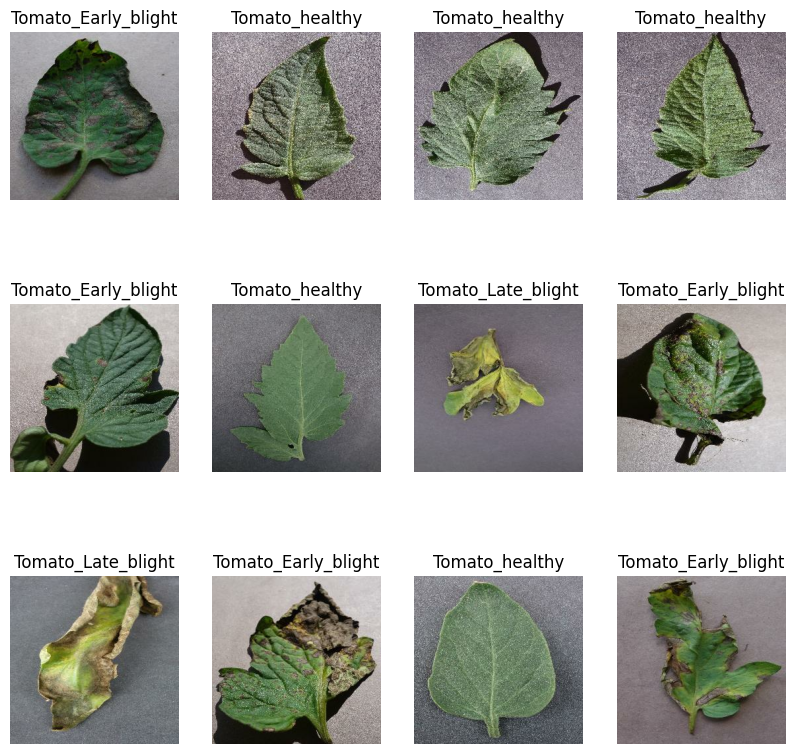

In [5]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())
    for i in range(12):
        ax = plt.subplot(3, 4, i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [6]:
train_size = 0.8
len(dataset)*train_size

112.80000000000001

In [7]:
train_ds = dataset.take(112)
len(train_ds)

112

In [8]:
test_ds = dataset.skip(112)
len(test_ds)

29

In [9]:
val_size = 0.1
len(dataset)*val_size

14.100000000000001

In [10]:
val_ds = test_ds.take(14)
len(val_ds)

14

In [11]:
test_ds = test_ds.skip(14)
len(test_ds)

15

In [12]:
def get_dataset_partitions_tf(ds, train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle = True, shuffle_size = 10000):
    assert (train_split+test_split+val_split) == 1
    
    ds_size = len(ds)
           
    if shuffle:
           ds = ds.shuffle(shuffle_size, seed = 12)
           
    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [13]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [14]:
len(train_ds)

112

In [15]:
len(val_ds)

14

In [16]:
len(test_ds)

15

In [17]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [18]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[129. 132. 139.]
  [113. 116. 123.]
  [111. 114. 121.]
  ...
  [ 96.  99. 106.]
  [102. 105. 112.]
  [106. 109. 116.]]

 [[127. 130. 137.]
  [114. 117. 124.]
  [111. 114. 121.]
  ...
  [ 99. 102. 109.]
  [101. 104. 111.]
  [102. 105. 112.]]

 [[122. 125. 132.]
  [115. 118. 125.]
  [113. 116. 123.]
  ...
  [102. 105. 112.]
  [ 99. 102. 109.]
  [ 96.  99. 106.]]

 ...

 [[116. 119. 124.]
  [115. 118. 123.]
  [125. 128. 133.]
  ...
  [108. 115. 121.]
  [ 97. 104. 110.]
  [ 84.  91.  97.]]

 [[115. 118. 123.]
  [113. 116. 121.]
  [123. 126. 131.]
  ...
  [105. 112. 118.]
  [105. 112. 118.]
  [106. 113. 119.]]

 [[113. 116. 121.]
  [111. 114. 119.]
  [120. 123. 128.]
  ...
  [107. 114. 120.]
  [105. 112. 118.]
  [113. 120. 126.]]]


In [18]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].numpy()/255)

[[[0.79607844 0.7882353  0.80784315]
  [0.7882353  0.78039217 0.8       ]
  [0.78039217 0.77254903 0.7921569 ]
  ...
  [0.5882353  0.57254905 0.5764706 ]
  [0.5764706  0.56078434 0.5647059 ]
  [0.5882353  0.57254905 0.5764706 ]]

 [[0.8        0.7921569  0.8117647 ]
  [0.79607844 0.7882353  0.80784315]
  [0.78431374 0.7764706  0.79607844]
  ...
  [0.5921569  0.5764706  0.5803922 ]
  [0.65882355 0.6431373  0.64705884]
  [0.5372549  0.52156866 0.5254902 ]]

 [[0.8117647  0.8039216  0.8235294 ]
  [0.8039216  0.79607844 0.8156863 ]
  [0.79607844 0.7882353  0.80784315]
  ...
  [0.6627451  0.64705884 0.6509804 ]
  [0.6117647  0.59607846 0.6       ]
  [0.6        0.58431375 0.5882353 ]]

 ...

 [[0.64705884 0.6156863  0.6039216 ]
  [0.654902   0.62352943 0.6117647 ]
  [0.6627451  0.6313726  0.61960787]
  ...
  [0.6156863  0.5803922  0.56078434]
  [0.57254905 0.5372549  0.5176471 ]
  [0.5294118  0.49411765 0.4745098 ]]

 [[0.654902   0.62352943 0.6117647 ]
  [0.654902   0.62352943 0.6117647 ]


In [19]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
]
)

# DATA AUGMENTATION

In [20]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
]
)

# MODEL ARCHITECTURE

In [21]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

# 17 CNN layers
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(n_classes, activation = 'softmax'),
    
])
model.build(input_shape = input_shape)

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [23]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']
)

In [24]:
history = model.fit(
    train_ds,
    batch_size = BATCH_SIZE,
    validation_data = val_ds,
    verbose = 1,
    epochs = EPOCHS
)

Epoch 1/50
112/112 [==============================] - 347s 3s/step - loss: 0.9327 - accuracy: 0.5319 - val_loss: 0.5447 - val_accuracy: 0.7701
Epoch 2/50
112/112 [==============================] - 335s 3s/step - loss: 0.4605 - accuracy: 0.8021 - val_loss: 0.3126 - val_accuracy: 0.8638
Epoch 3/50
112/112 [==============================] - 320s 3s/step - loss: 0.4041 - accuracy: 0.8379 - val_loss: 0.3594 - val_accuracy: 0.8549
Epoch 4/50
112/112 [==============================] - 314s 3s/step - loss: 0.3306 - accuracy: 0.8589 - val_loss: 0.2947 - val_accuracy: 0.8817
Epoch 5/50
112/112 [==============================] - 313s 3s/step - loss: 0.3283 - accuracy: 0.8665 - val_loss: 0.5247 - val_accuracy: 0.8214
Epoch 6/50
112/112 [==============================] - 337s 3s/step - loss: 0.2939 - accuracy: 0.8698 - val_loss: 0.4381 - val_accuracy: 0.8304
Epoch 7/50
112/112 [==============================] - 328s 3s/step - loss: 0.3428 - accuracy: 0.8670 - val_loss: 0.2614 - val_accuracy: 0.9152

In [25]:
len(test_ds)

15

In [28]:
scores = model.evaluate(test_ds)

15/15 [==============================] - 15s 989ms/step - loss: 0.1603 - accuracy: 0.9458


In [30]:
scores

[0.16033710539340973, 0.9458333253860474]

In [31]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [37]:
history.history['accuracy']

[0.5319148898124695,
 0.8020716905593872,
 0.8379059433937073,
 0.8589025735855103,
 0.8664613366127014,
 0.8698208332061768,
 0.8670212626457214,
 0.8891377449035645,
 0.8938969969749451,
 0.9011757969856262,
 0.9092944860458374,
 0.9157334566116333,
 0.8978163599967957,
 0.9098544120788574,
 0.9067749381065369,
 0.9207726716995239,
 0.9221724271774292,
 0.914613664150238,
 0.9294512867927551,
 0.9162933826446533,
 0.935330331325531,
 0.9414893388748169,
 0.9440089464187622,
 0.9395296573638916,
 0.9269316792488098,
 0.9308510422706604,
 0.9440089464187622,
 0.9456886649131775,
 0.9484882354736328,
 0.9535274505615234,
 0.9400895833969116,
 0.9605262875556946,
 0.9521276354789734,
 0.9616461396217346,
 0.9540873169898987,
 0.9608062505722046,
 0.9552071690559387,
 0.9697648286819458,
 0.956886887550354,
 0.9650055766105652,
 0.9627659320831299,
 0.9644457101821899,
 0.9703247547149658,
 0.9711645841598511,
 0.9675251841545105,
 0.9647256731987,
 0.979283332824707,
 0.958286702632904,


In [38]:
type(history.history['loss'])

list

In [39]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

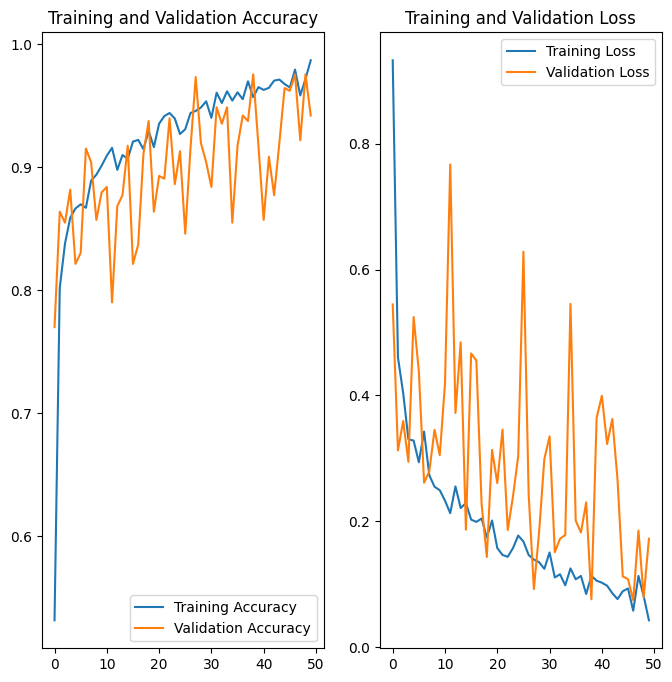

In [40]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Tomato_Early_blight
1/1 [==============================] - 1s 1s/step
predicted label: Tomato_Early_blight


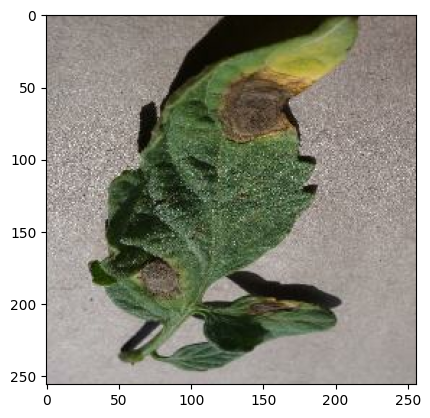

In [66]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [60]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 104ms/step


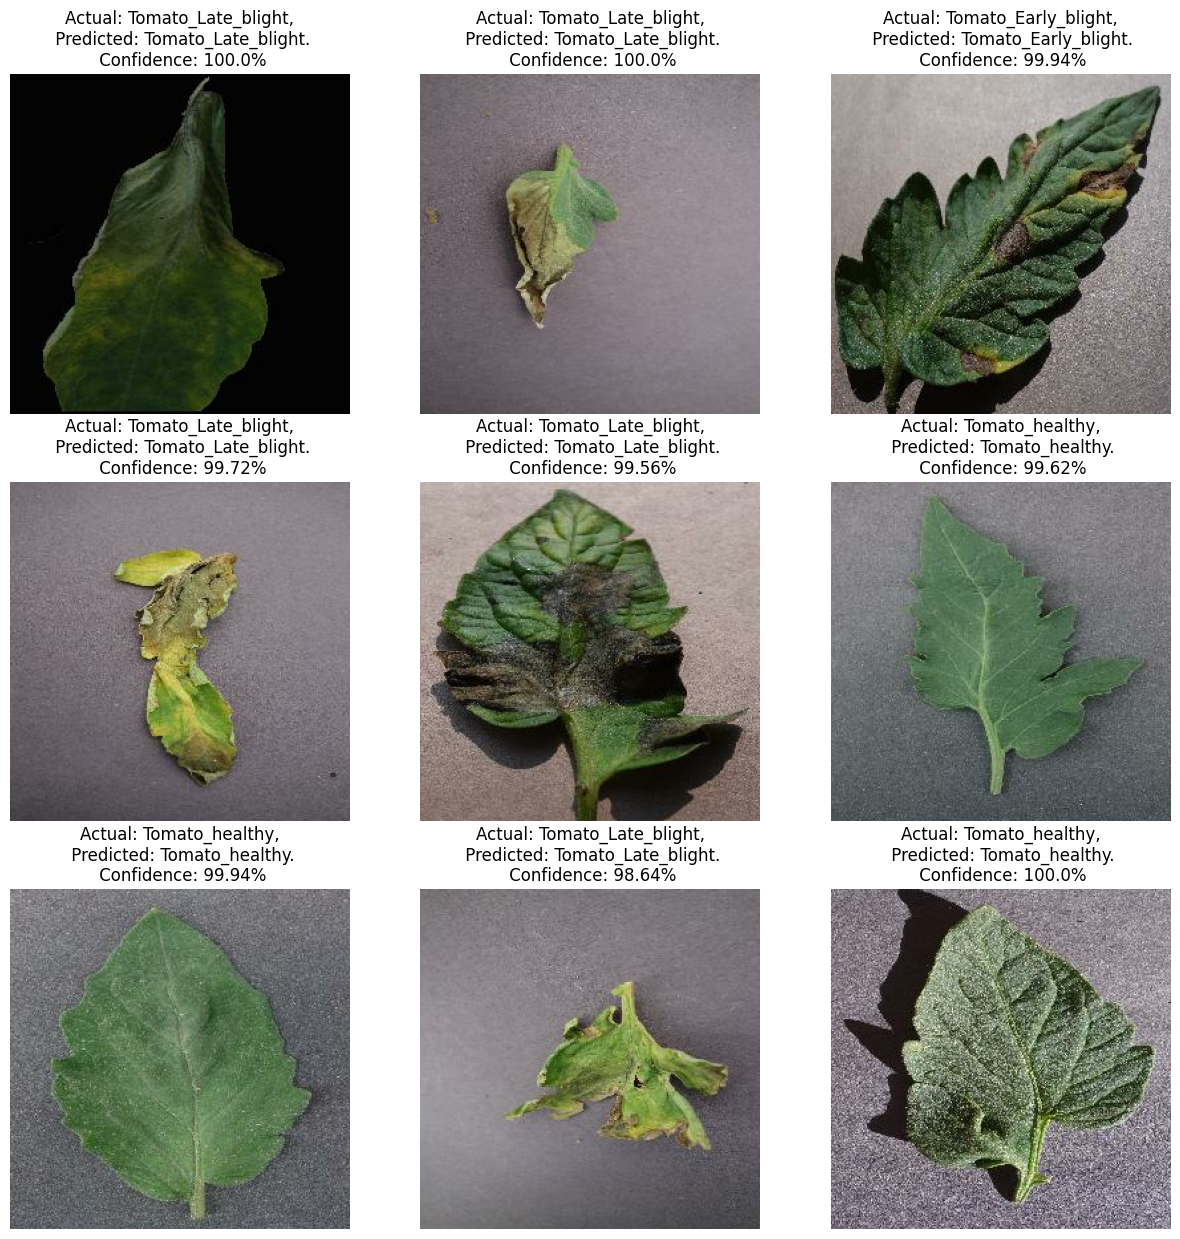

In [61]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [64]:
import os
model_version = max([int(i) for i in os.listdir("../saved_models") + [0]])+1
model.save(f"../saved_models/{model_version}")

INFO:tensorflow:Assets written to: ../saved_models/1\assets


INFO:tensorflow:Assets written to: ../saved_models/1\assets


In [65]:
model.save("../tomatoes.h5")